In [2]:
%pylab inline
import fitit
from importlib import reload

Populating the interactive namespace from numpy and matplotlib


In [8]:
reload(fitit)

<module 'fitit' from 'C:\\Users\\callum\\c\\fitit\\fitit.py'>

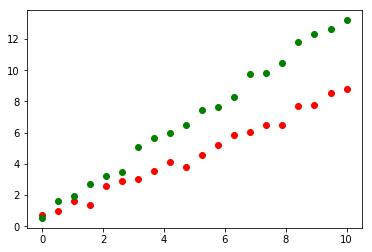

In [5]:
xs = linspace(0, 10, 20)

ys1 = xs * .8 + rand(20)
ys2 = xs * 1.3 + rand(20)

figure()
plot(xs, ys1, 'ro')
plot(xs, ys2, 'go')

# 1d fit

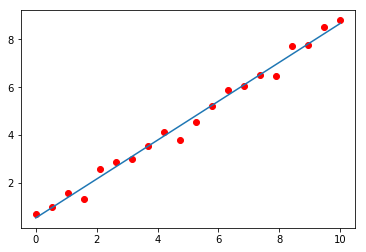

In [10]:
reload(fitit)
p0 = fitit.Params('m b')
p0.m = 1.
p0.b = 1.

def fitfunc(x, p):
    return p.m * x + p.b

popt = fitit.fit(fitfunc, xs, ys1, p0)

figure()
plot(xs, ys1, 'ro')
plot(xs, fitfunc(xs, popt))

## 1d using 'trf' method

 m: 0.811325
 b: 0.545296

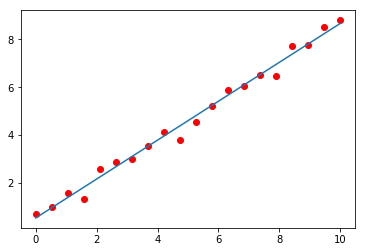

In [16]:
reload(fitit)
p0 = fitit.Params('m b')
p0.m = 1.
p0.b = 1.

def fitfunc(x, p):
    return p.m * x + p.b

popt = fitit.fit(fitfunc, xs, ys1, p0, method='trf')

figure()
plot(xs, ys1, 'ro')
plot(xs, fitfunc(xs, popt))
popt

# 1d with limits

 m: 0.6
 b: 1.60192

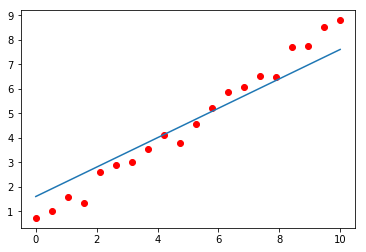

In [24]:
reload(fitit)
p0 = fitit.Params('m b')
p0.m = .5
p0.b = 1.

pub = fitit.Params(like=p0)
pub.m = 0.6
pub.b = inf


plb = fitit.Params(like=p0)
plb.m = -inf
plb.b = -inf

def fitfunc(x, p):
    return p.m * x + p.b

popt = fitit.fit(fitfunc, xs, ys1, p0, bounds=(plb, pub))

figure()
plot(xs, ys1, 'ro')
plot(xs, fitfunc(xs, popt))

popt

# 2d fit

 m: 0.855341
 b: 0.35936
{'b': 0.1486390767806271, 'm': 0.019935467857770332}


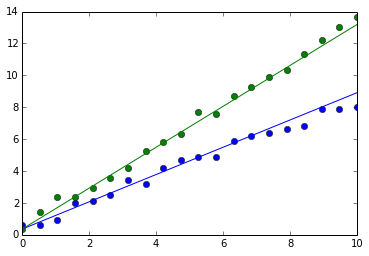

In [5]:
p0 = fitit.Params('m b')
p0.m = 1.
p0.b = 1.

def fitfunc(x, p):
    return [
        p.m * x + p.b,
        1.5 * p.m * x + p.b,
    ]

popt = fitit.fit(fitfunc, xs, [ys1, ys2], p0)

figure()
plot(xs, ys1, 'bo')
plot(xs, ys2, 'go')
plot(xs, fitfunc(xs, popt)[0])
plot(xs, fitfunc(xs, popt)[1])

print popt
print popt.errors